## Load dataset

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

print(tf.__version__)
print(tf.config.list_physical_devices())
print(np.__version__)


2.8.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1.21.5


In [ ]:
AES = pd.read_csv('/content/drive/MyDrive/Automated Essay Scorer/training_set_rel3.tsv', sep='\t', encoding = "ISO-8859-1")
AES.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
AES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [ ]:
duplicate = AES[AES.essay.duplicated()] 
duplicate

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
5149,7549,3,"In the setting of the essay; ""Rough Road Ahead...",1,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5290,7690,3,In the essay the features of the setting affec...,2,2,NaN,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6689,10248,4,The author concludes the story with that parag...,0,0,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6908,10468,4,The author concluded this paragraph in this st...,1,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check missing values

In [ ]:
#check missing value 
%matplotlib inline

def missing_values(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize = 20, weight = 'bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh + 12.5, f'Columns with more than {thresh}% missing values', fontsize = 12, color = 'crimson',
         ha = 'left' ,va = 'top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha = 'left' ,va = 'top')
    plt.xlabel('Columns', size = 15, weight = 'bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight = 'bold')
    
    return plt.show()

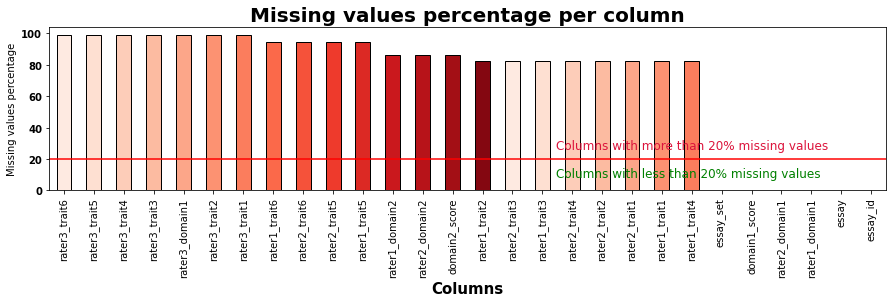

In [ ]:
missing_values(AES, thresh = 20, color = sns.color_palette('Reds',15))


## Score distribution of each set

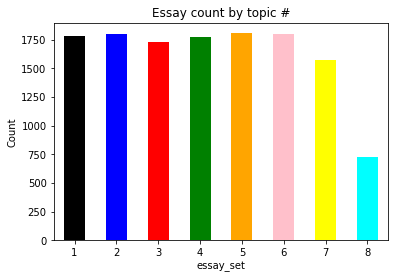

In [ ]:
AES.groupby('essay_set').agg('count').plot.bar(y='essay',color=['black', 'blue','red', 'green',"orange", "pink","yellow", 'cyan'], rot=0, legend=False)
plt.title('Essay count by topic #')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


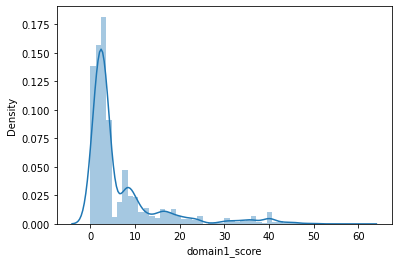

In [ ]:
sns.distplot(AES['domain1_score'])


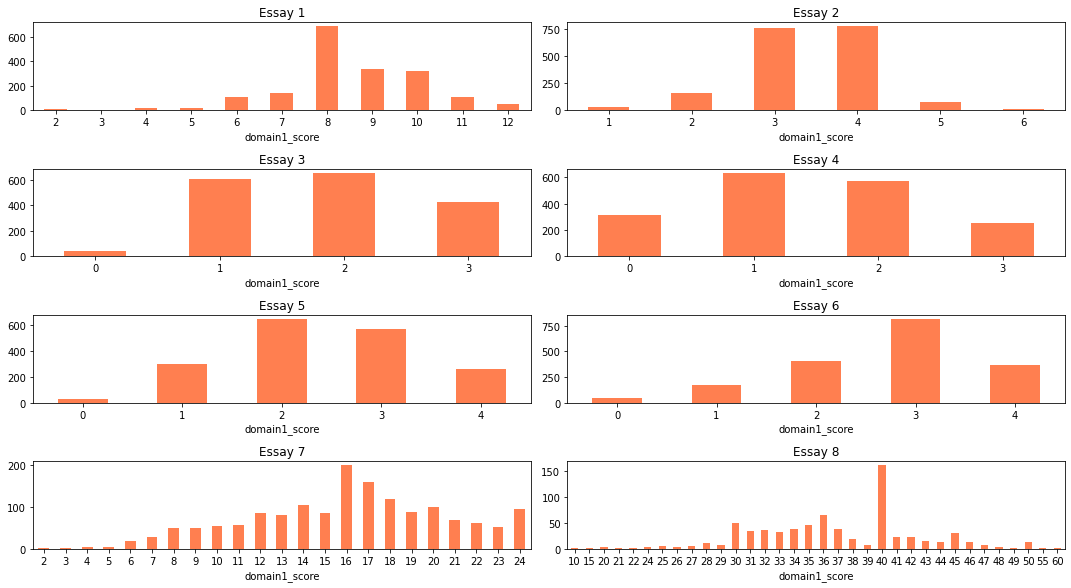

In [ ]:
topic_number = 0
fig, ax = plt.subplots(4,2, figsize=(15,9), sharey=False)
for i in range(4):
    for j in range(2):
        topic_number += 1
        AES[AES['essay_set'] == topic_number]\
            .groupby('domain1_score')['essay_id']\
            .agg('count')\
            .plot.bar(ax=ax[i, j], rot=0, color="coral")
        ax[i,j].set_title('Essay %i' % topic_number)
# ax[3,0].locator_params(nbins=10)
# ax[3,1].locator_params(nbins=10)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Text(0.5, 1.0, 'mean essays set value of column domain1_score')

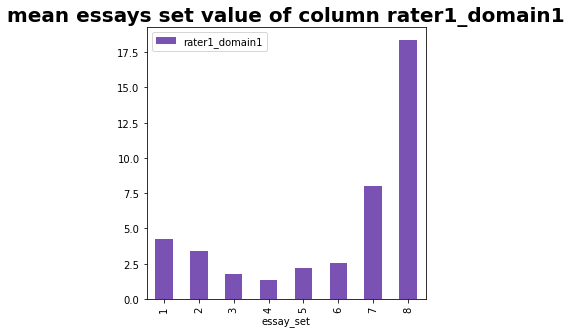

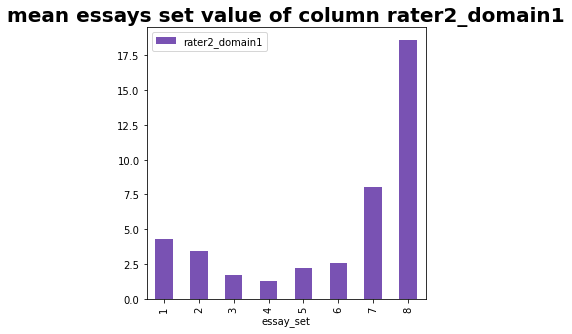

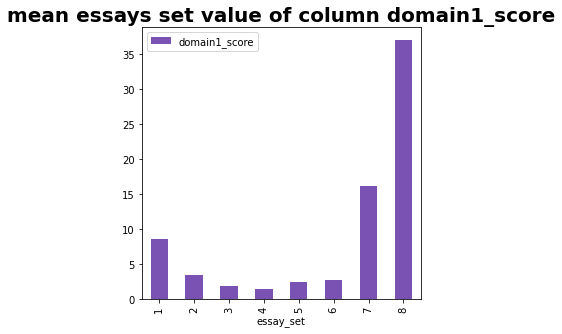

In [ ]:
a_0 = AES.groupby("essay_set").agg({"rater1_domain1":"mean"})
plt.rcParams["figure.figsize"] = (5,5)
a_0.plot(kind="bar", color="#7952B3")
plt.title('mean essays set value of column rater1_domain1', fontsize=20, fontweight='bold')

a_1 = AES.groupby("essay_set").agg({"rater2_domain1":"mean"})
plt.rcParams["figure.figsize"]=(5,5)
a_1.plot(kind="bar", color="#7952B3")
plt.title('mean essays set value of column rater2_domain1', fontsize=20, fontweight='bold')

a_2 = AES.groupby("essay_set").agg({"domain1_score":"mean"}) 
plt.rcParams["figure.figsize"]=(5,5)
a_2.plot(kind="bar", color="#7952B3")
plt.title('mean essays set value of column domain1_score', fontsize=20, fontweight='bold')


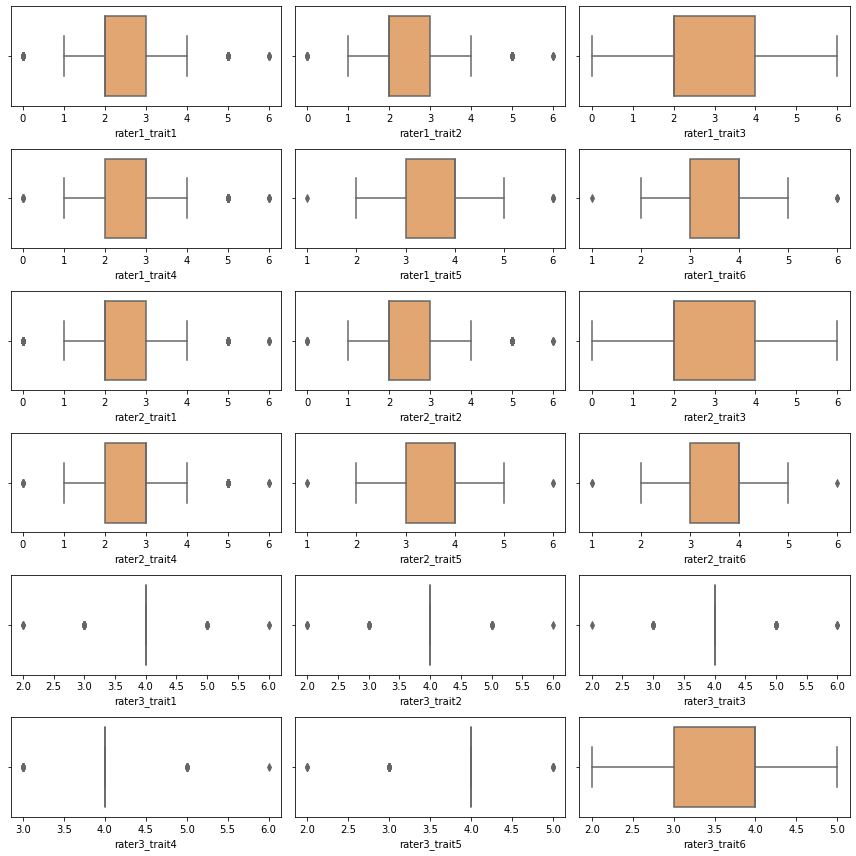

In [ ]:
d = AES.iloc[:,10:]
names = list(d.columns)
f, axes = plt.subplots(round(len(names)/3), 3, figsize=(12, 12))  
y = 0;
for name in names:
    i, j = divmod(y, 3)
    sns.boxplot(x=d[name], ax=axes[i, j], color="sandybrown")
    y = y + 1

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


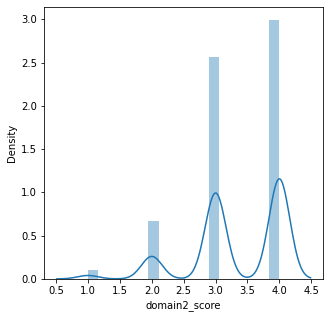

In [ ]:
sns.distplot(AES['domain2_score'])


## Number of words of essays in each set

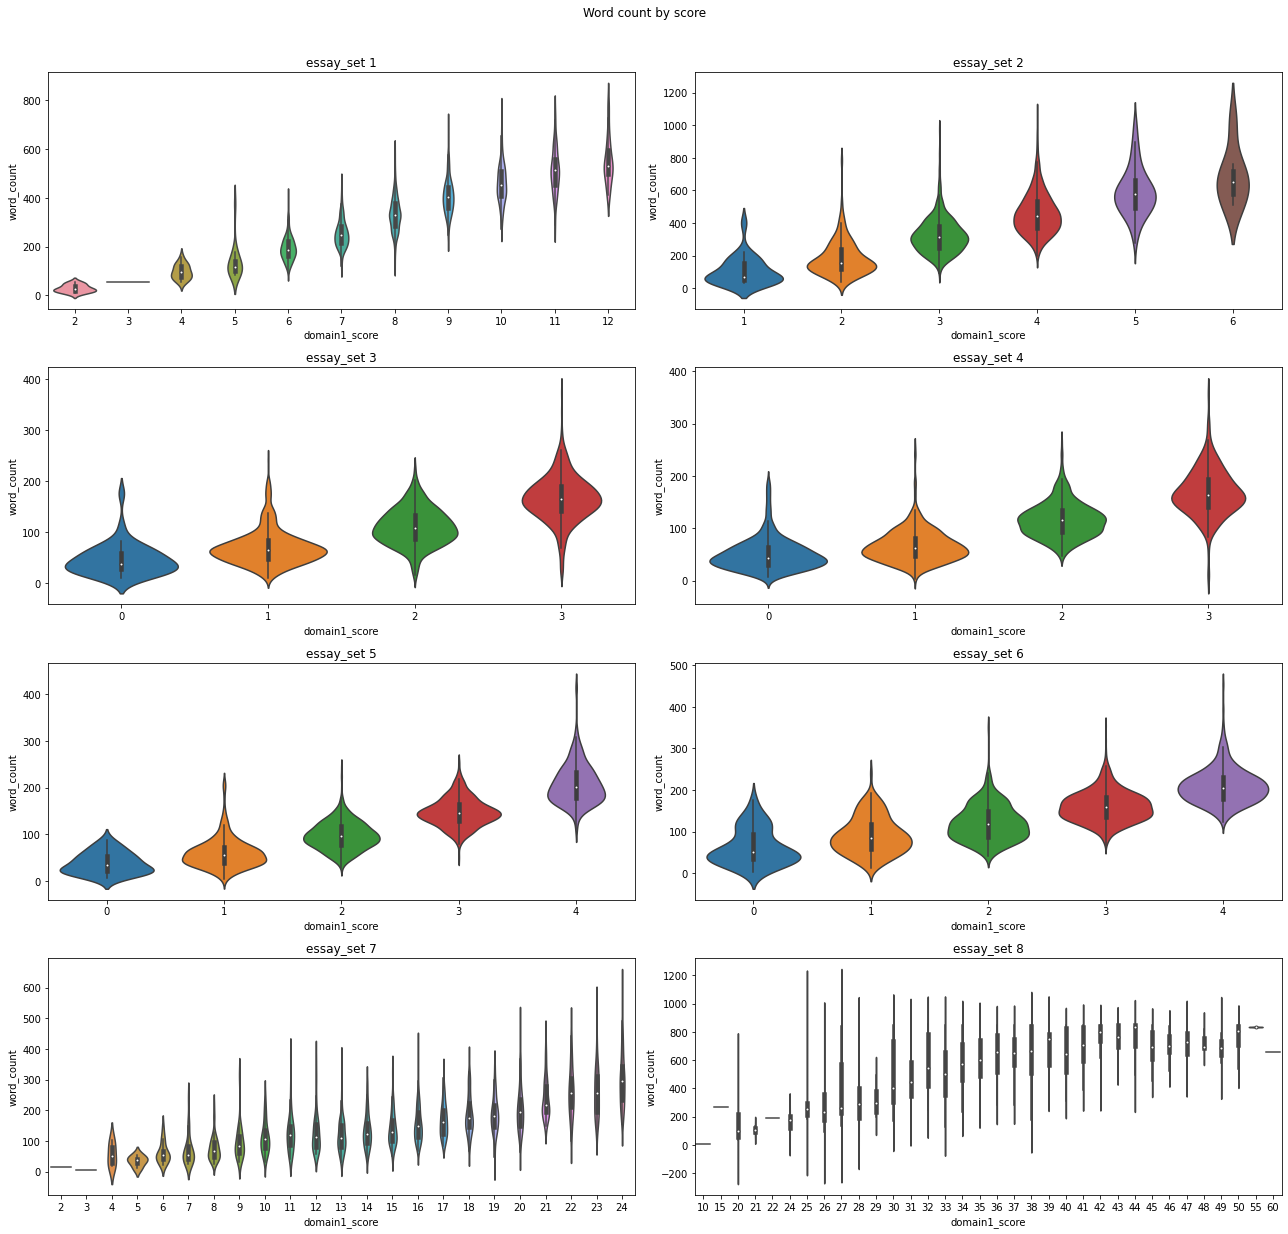

In [ ]:
AES['word_count'] = AES['essay'].str.strip().str.split().str.len()
topic_number = 0
fig, ax = plt.subplots(4,2, figsize=(18,18))
for i in range(4):
    for j in range(2):
        topic_number += 1
        sns.violinplot(x='domain1_score', y='word_count', data=AES[AES['essay_set'] == topic_number], ax=ax[i,j])
        ax[i,j].set_title('essay_set %i' % topic_number)
# ax[3,0].locator_params(nbins=10)
# ax[3,1].locator_params(nbins=10)
plt.suptitle('Word count by score')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()